In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

#### File Reading

In [3]:
csvFileLocation = 'data/targetfirm_prediction_dataset_small.csv'

In [4]:
finance_dataframe = pd.read_csv(csvFileLocation)

In [5]:
finance_dataframe.head()

,Unnamed: 0,gvkey,fyear,target,at,revt,ib,ca,capx,ceq,che,emp,invt,re,xrd,dltt,dv,sic
0,6,1004,2000.0,0.0,701.854,874.255,18.531,NaN,13.134,340.212,13.809,2.5,320.590,204.065,NaN,179.987,9.157,5080.0
1,7,1004,2001.0,0.0,710.199,638.721,-58.939,NaN,12.112,310.235,34.522,2.2,286.588,139.603,NaN,217.699,4.430,5080.0
2,8,1004,2002.0,0.0,686.621,606.337,-12.410,NaN,9.930,294.988,29.154,2.1,259.954,124.106,NaN,164.658,0.797,5080.0
3,9,1004,2003.0,0.0,709.292,651.958,3.504,NaN,10.286,301.684,41.010,2.3,247.245,131.884,NaN,248.666,0.000,5080.0
4,10,1004,2004.0,0.0,732.230,747.848,18.572,NaN,13.033,314.744,50.338,2.6,255.477,142.450,NaN,227.159,0.000,5080.0


#### Data Cleaning

In [6]:
finance_dataframe.isna().sum()

Unnamed: 0         0
gvkey              0
fyear              0
target             0
at             34635
revt           35677
ib             35660
ca            211399
capx           63184
ceq            35063
che            57076
emp            63859
invt           53353
re             40548
xrd           150287
dltt           35036
dv             65058
sic                3
dtype: int64

In [7]:
# dropping columns which contains more than 60% NaN values.

columns = finance_dataframe.columns
for col in columns:
    if finance_dataframe[col].isna().sum() >= len(finance_dataframe)*0.6:
        finance_dataframe.drop(columns=[col], inplace=True)

In [8]:
finance_dataframe.fillna(0,inplace=True)

In [9]:
finance_dataframe.isna().sum()

Unnamed: 0    0
gvkey         0
fyear         0
target        0
at            0
revt          0
ib            0
capx          0
ceq           0
che           0
emp           0
invt          0
re            0
dltt          0
dv            0
sic           0
dtype: int64

#### Data Visualization

In [10]:
finance_dataframe.corr()

,Unnamed: 0,gvkey,fyear,target,at,revt,ib,capx,ceq,che,emp,invt,re,dltt,dv,sic
Unnamed: 0,1.000000,0.952367,0.155923,0.001362,-0.083680,-0.133506,-0.084847,-0.076715,-0.111489,-0.047532,-0.122380,-0.038656,-0.100092,-0.052703,-0.080442,0.049279
gvkey,0.952367,1.000000,0.160542,-0.000995,-0.061759,-0.098166,-0.059629,-0.048796,-0.079737,-0.033973,-0.090618,-0.031278,-0.071371,-0.039388,-0.054188,0.025079
fyear,0.155923,0.160542,1.000000,-0.022569,0.028465,0.031154,0.031602,0.028104,0.048720,0.021665,0.009652,0.004314,0.034446,0.018861,0.042587,0.001752
target,0.001362,-0.000995,-0.022569,1.000000,0.007956,0.012633,0.009578,-0.000295,0.013463,0.007151,0.004641,0.002051,0.010845,0.001124,0.001559,0.018790
at,-0.083680,-0.061759,0.028465,0.007956,1.000000,0.475869,0.361056,0.155549,0.611279,0.606885,0.278413,0.261155,0.443250,0.588733,0.308805,0.036945
revt,-0.133506,-0.098166,0.031154,0.012633,0.475869,1.000000,0.574908,0.685839,0.707128,0.308636,0.668437,0.230391,0.664255,0.272088,0.557734,-0.020152
ib,-0.084847,-0.059629,0.031602,0.009578,0.361056,0.574908,1.000000,0.433550,0.592323,0.247623,0.348491,0.151357,0.604742,0.203847,0.534578,-0.007802
capx,-0.076715,-0.048796,0.028104,-0.000295,0.155549,0.685839,0.433550,1.000000,0.557142,0.128961,0.432310,0.125157,0.529393,0.094468,0.514502,-0.061823
ceq,-0.111489,-0.079737,0.048720,0.013463,0.611279,0.707128,0.592323,0.557142,1.000000,0.439403,0.467133,0.234837,0.823977,0.087902,0.463579,0.000085
che,-0.047532,-0.033973,0.021665,0.007151,0.606885,0.308636,0.247623,0.128961,0.439403,1.000000,0.187329,0.478348,0.332835,0.241643,0.276193,0.020470


<AxesSubplot:>

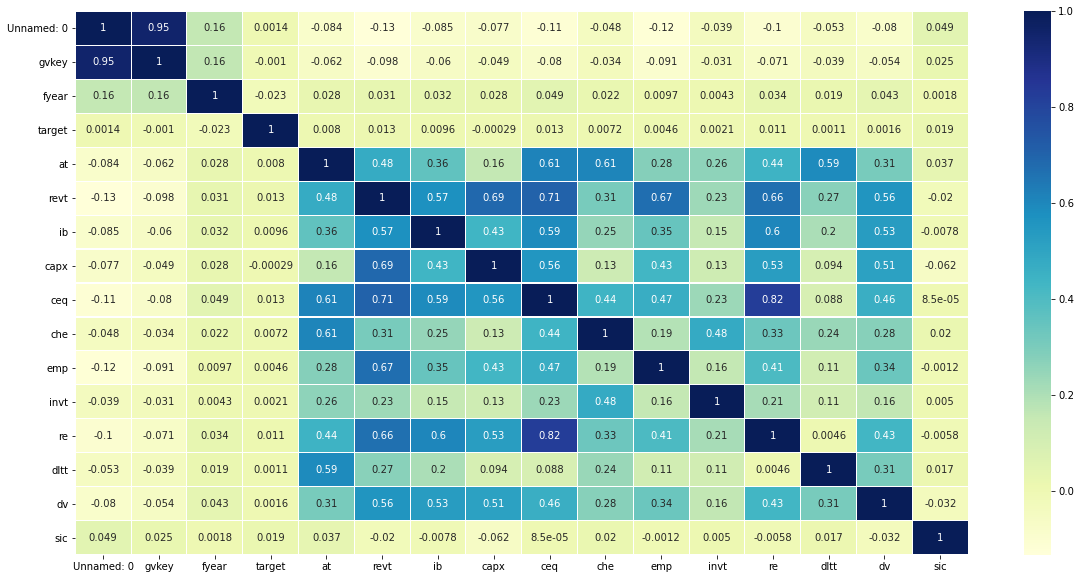

In [11]:
fig, ax = plt.subplots(figsize=(20,10))  
sns.heatmap(finance_dataframe.corr(), cmap="YlGnBu", linewidths=0.1, annot=True, ax=ax)

In [12]:
# sns.pairplot(finance_dataframe, hue='target', height=2.5)

# Train Test Split of Data

In [13]:
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(finance_dataframe, finance_dataframe['target'], test_size=0.3,random_state=100)

In [14]:
unique, counts = np.unique(X_train['target'], return_counts=True)
dict(zip(unique, counts))

{0.0: 156202, 1.0: 1305}

In [15]:
unique, counts = np.unique(X_test['target'], return_counts=True)
dict(zip(unique, counts))

{0.0: 66947, 1.0: 556}

## SVM

#### Training SVM Model

In [16]:
from sklearn import svm

In [17]:
sampleN = int(len(X_train)*0.01)
sampleN

1575

In [18]:
# SVM takes time to train, hence taking 40% sample of the training data to train the model

sample_X = X_train.sample(sampleN)
sample_y = sample_X['target']

In [19]:
clf = svm.SVC(kernel='linear')

In [20]:
# Taking too much time
# clf.fit(X_train, y_train)

clf.fit(sample_X,sample_y)

SVC(kernel='linear')

In [21]:
# import findspark
# findspark.init()

# import pyspark
# import random

# sc = pyspark.SparkContext(appName="svc")

# sc.parallelize(clf.fit(X_train,y_train))

# sc.stop()

# y_pred = clf.predict(X_test)

# print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

#### Predicting Target with SVM

In [22]:
y_pred = clf.predict(X_test)

In [72]:
unique, counts = np.unique(y_pred, return_counts=True)
dict(zip(unique, counts))

{0.0: 67066, 1.0: 437}

#### Metric Calculations for SVM

In [23]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9857043390664119


In [24]:
print("Precision:",metrics.precision_score(y_test, y_pred))

Precision: 0.032036613272311214


In [25]:
print("Recall:",metrics.recall_score(y_test, y_pred))

Recall: 0.025179856115107913


In [27]:
cm_svm = metrics.confusion_matrix(y_test, y_pred)
print(cm_svm)

[[66524   423]
 [  542    14]]


<AxesSubplot:>

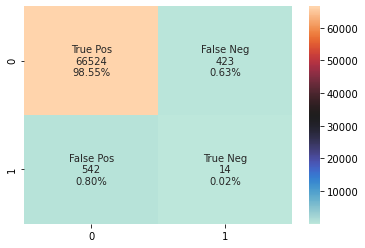

In [81]:
group_names = ['True Pos','False Neg','False Pos','True Neg']

group_counts = ["{0:0.0f}".format(value) for value in cm_svm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in cm_svm.flatten()/np.sum(cm_svm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm_svm, annot=labels, fmt='', cmap='icefire')

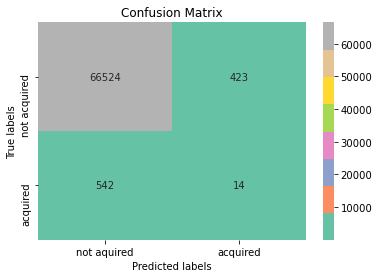

In [92]:
ax= plt.subplot()

# annot=True to annotate cells, ftm='g' to disable scientific notation
sns.heatmap(cm_svm, annot=True, fmt='g', ax=ax, cmap='Set2');  

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['not aquired', 'acquired']); ax.yaxis.set_ticklabels(['not acquired', 'acquired']);

## Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

In [37]:
logisticRegr = LogisticRegression()

#### Training Logistic Regression Model

In [38]:
logisticRegr.fit(X_train, y_train)

C:\Users\Sheetal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### Predicting Target with Logistic Regression

In [39]:
predictions = logisticRegr.predict(X_test)

#### Metric Calculation for Logistic Regression

In [71]:
unique, counts = np.unique(predictions, return_counts=True)
dict(zip(unique, counts))

{0.0: 67492, 1.0: 11}

In [40]:
score = logisticRegr.score(X_test, y_test)
print(score)

0.9916003733167414


In [41]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions))

Accuracy: 0.9916003733167414


In [42]:
print("Precision:",metrics.precision_score(y_test, predictions))

Precision: 0.0


In [43]:
print("Recall:",metrics.recall_score(y_test, predictions))

Recall: 0.0


In [44]:
cm_lr= metrics.confusion_matrix(y_test, predictions)
print(cm_lr)

[[66936    11]
 [  556     0]]


<AxesSubplot:>

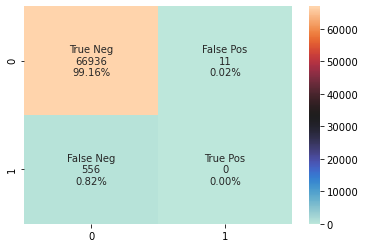

In [82]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in cm_lr.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in cm_lr.flatten()/np.sum(cm_svm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm_lr, annot=labels, fmt='', cmap='icefire')

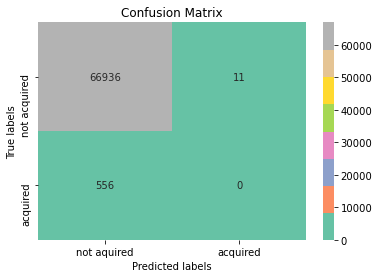

In [91]:
ax= plt.subplot()

# annot=True to annotate cells, ftm='g' to disable scientific notation
sns.heatmap(cm_lr, annot=True, fmt='g', ax=ax, cmap='Set2');  

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['not aquired', 'acquired']); ax.yaxis.set_ticklabels(['not acquired', 'acquired']);